In [46]:
import elementary as e
import scipy

In [47]:
# Basic plotting defaults
import matplotlib.pyplot as plt
%matplotlib inline
# Use better color defaults
plt.style.use("seaborn-pastel")

# CW06 

#### Enea Dodi, Monica Hiemer, Natanael

##### 10/10/2018

## Instructions

* create 1 generic Particle instance, 1 Electron instance, and 1 Proton instance. 
* show that each has different mass.
* Give each particle an initial momentum of $\vec{p}_0 = (10,\text{kg m/s}),\hat{k} \sim (0,,0,,10),\text{kg m/s}$ (straight up).
* Start the initial positions at $\vec{r}_0 \sim (0,,0,,1)\text{m}$, $(0,,0,,2)\text{m}$, and $(0,,0,,3)\text{m}$, respectively, where $\vec{r} \sim (x,,y,,z)$.
* create a plot that shows the $z$ coordinate of each particle plotted as a function of time, $z(t)$, after placing each particle in a gravitational field $\vec{g}$. 
* For each time step dt,apply an impulse $d\vec{p}$ to each particle from the gravitational field, then apply the .move(dt) method and store the new $z$ coordinate of each particle.
* After you have accumulated $5$ seconds worth of time steps, plot each particle trajectory $z(t)$ on the same graph. 
* Comment about your findings regarding how electrons, protons, and generic particles all move in a gravitational field.

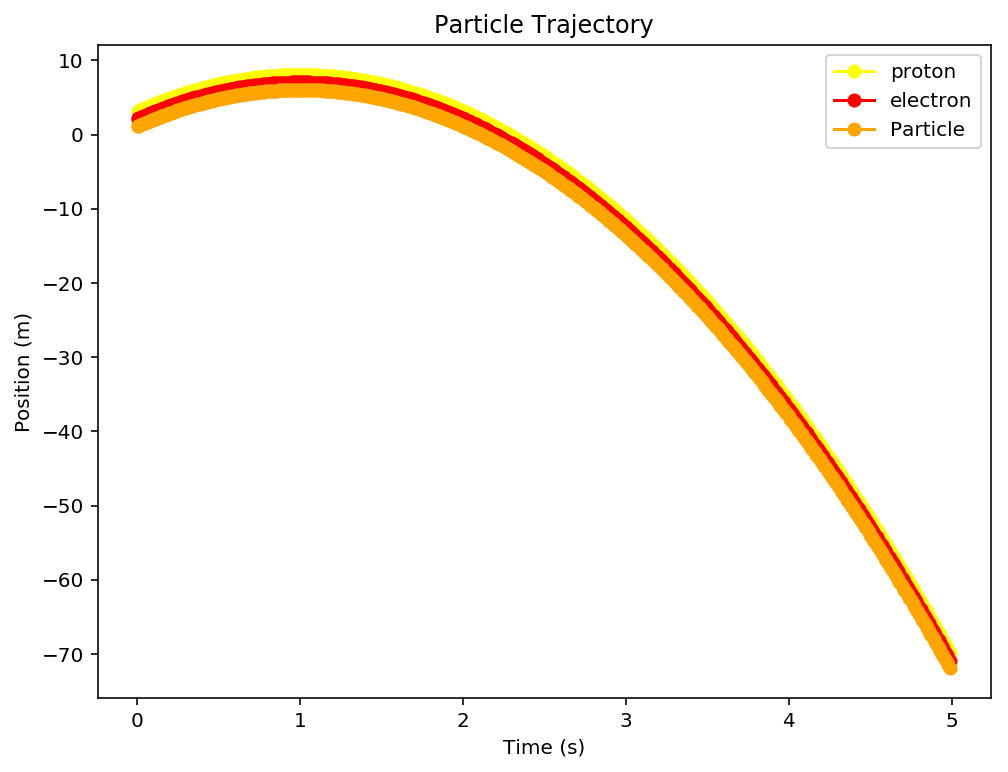

In [58]:
import scipy.constants
particle = e.Particle(0,0,1)
particle.impulse(0,0,particle.mass*10)
electron = e.Electron(0,0,2)
electron.impulse(0,0,electron.mass*10)
proton = e.Proton(0,0,3)
proton.impulse(0,0,proton.mass*10)


ypoints = []
ypoints2 = []
ypoints3 = []
xpoints = []
#ypoints.append(proton.position[2])
#ypoints2.append(electron.position[2])
#ypoints3.append(particle.position[2])
dt = 1e-2
dp = 0.005
for i in range(500):
    proton.impulse(0,0,-proton.mass*9.81*dt)
    electron.impulse(0,0,-electron.mass*9.81*dt)
    particle.impulse(0,0,-particle.mass*9.81*dt)
    proton.move(dt)
    electron.move(dt)
    particle.move(dt)
    ypoints.append(proton.position[2])
    ypoints2.append(electron.position[2])
    ypoints3.append(particle.position[2])
    if i == 0:
        xpoints.append(dt)
    else:
        xpoints.append(dt*i)

# First create a figure, with "handle" stored in variable f
# The figsize is displayed in inches (on a printed page), with (width, height)
f = plt.figure(figsize=(8,6))
# Then create axes on the figure, with "handle" stored in variable a
a = plt.axes()
# Explicitly plot matched pairs of x-y points on the axis a
a.plot(xpoints, ypoints, marker='o', color = "yellow", label="proton")
# Explicitly plot different matched pair of x-y points, with circle markers in a different color
a.plot(xpoints, ypoints2, marker="o", color="Red", label="electron")
# Explicitly plot different matched pair of x-y points, with circle markers in a different color
a.plot(xpoints, ypoints3, marker="o", color="orange", label="Particle")
# Explicitly set axis labels and a plot title
a.set(xlabel="Time (s)", ylabel="Position (m)", title="Particle Trajectory")
# Add a legend describing which curve is which
a.legend()
# Show the active plot to the screen
plt.show()